# BST plots

In [1]:
from sst_bst import BSTs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
def P2dB(X): 
    return 10*np.log10(X+1e-3)

In [19]:
START_TIME="2022-12-22 13:00:00"
END_TIME=  "2023-01-06 16:00:00"
step_mins=15;
tstart=datetime.fromisoformat(START_TIME) 
filename="BST_%s_%s_%i.npy"%(START_TIME,END_TIME,step_mins)
bst=BSTs('bst') 
try:
    D=np.load(filename)
except:
    
    tend  =datetime.fromisoformat(END_TIME)
    D=bst.getData_percentile(tstart,tend,step_mins*60,percentile=30) 
    np.save(filename,D)
finally:
    print(D.shape)

(1452, 2, 976)


In [22]:
from sst_bst_2 import SSTs
filename="LBA_%s_%s_%imin.npy"%(START_TIME,END_TIME,step_mins)
sst=SSTs('sst') #sst directoty
input_label = ['L72_X', 'L72_Y', 'L77_X', 'L77_Y', 'L83_X', 'L83_Y', 'L88_X', 'L88_Y', 'L90_X', 'L90_Y', 'L92_X', 'L92_Y', 'L93_X', 'L93_Y', 'L94_X', 'L94_Y', 'L95_X', 'L95_Y']
sst.input_label=input_label
sst.D=np.load(filename)
print(sst.D.shape)

(1451, 18, 512)


(1452, 2, 976) 225 481
(1452, 2, 256) (1451, 18, 512)


(0.0, 100.0)

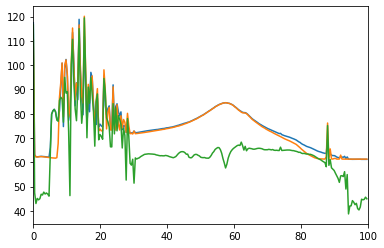

In [49]:
Nstart=225
Nstop=Nstart+512//2
print(D.shape,Nstart,Nstop)
Ds=D.shape
D2=(D.reshape([Ds[0],2,488,2])[:,:,Nstart:Nstop,0])
freq=np.arange(0,512,2)/512*100
print(D2.shape,sst.D.shape)
Da=D2[0,0,:]
Db=(np.sum(sst.D[0,::2,::2],axis=0))
plt.plot(freq,P2dB(Da))
plt.plot(freq,P2dB(Db))
plt.plot(freq,P2dB(np.abs(Da-Db)))
plt.xlim(0,100)

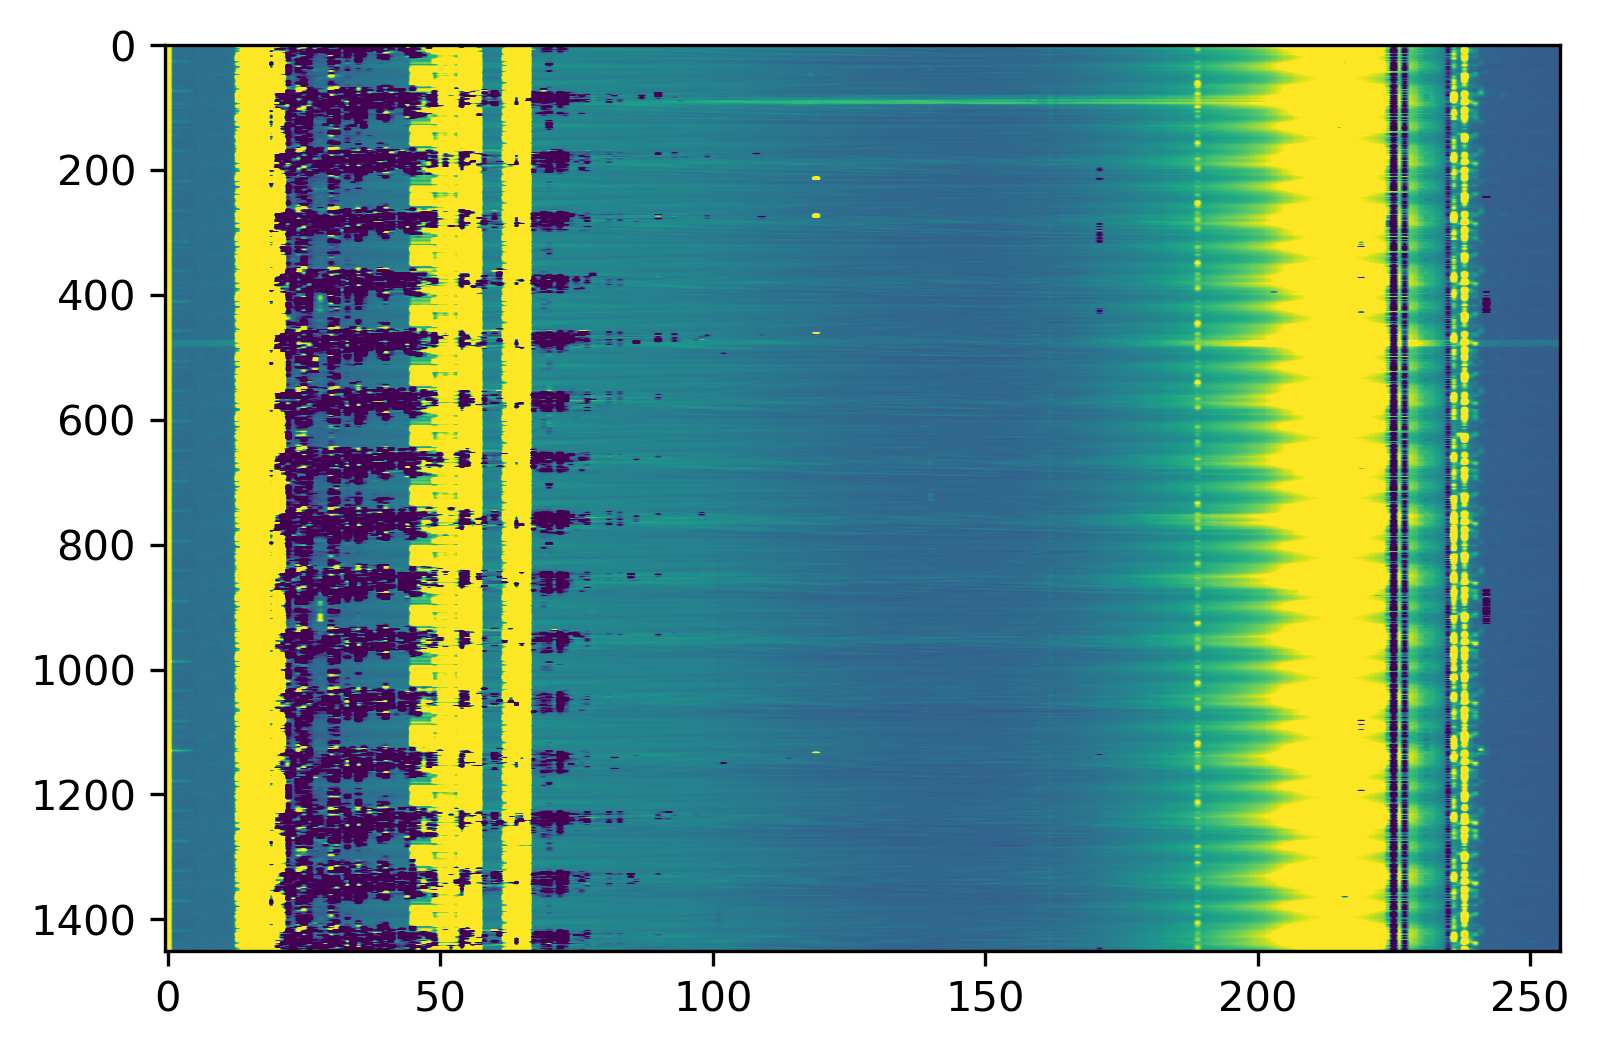

In [71]:
Nx=1451
Da=D2[:Nx,0,:]
Db=(np.sum(sst.D[:,::2,::2],axis=1))
#Dc=P2dB(np.abs(Da-Db))
Dc=((Da-Db)/(Da+Db))
#Dc=np.abs(P2dB(Da)-P2dB(Db))
plt.figure(dpi=300)
plt.imshow(Dc,vmax=0.2,vmin=-0.1,aspect='auto')
#plt.imshow(Dc,aspect='auto')
#plt.plot(freq,((Da[0]-Db[0])/(Da[0]+Db[0])))
#plt.plot(freq,np.abs(P2dB(Da[0])-P2dB(Db[0])))
#plt.ylim(50,100)

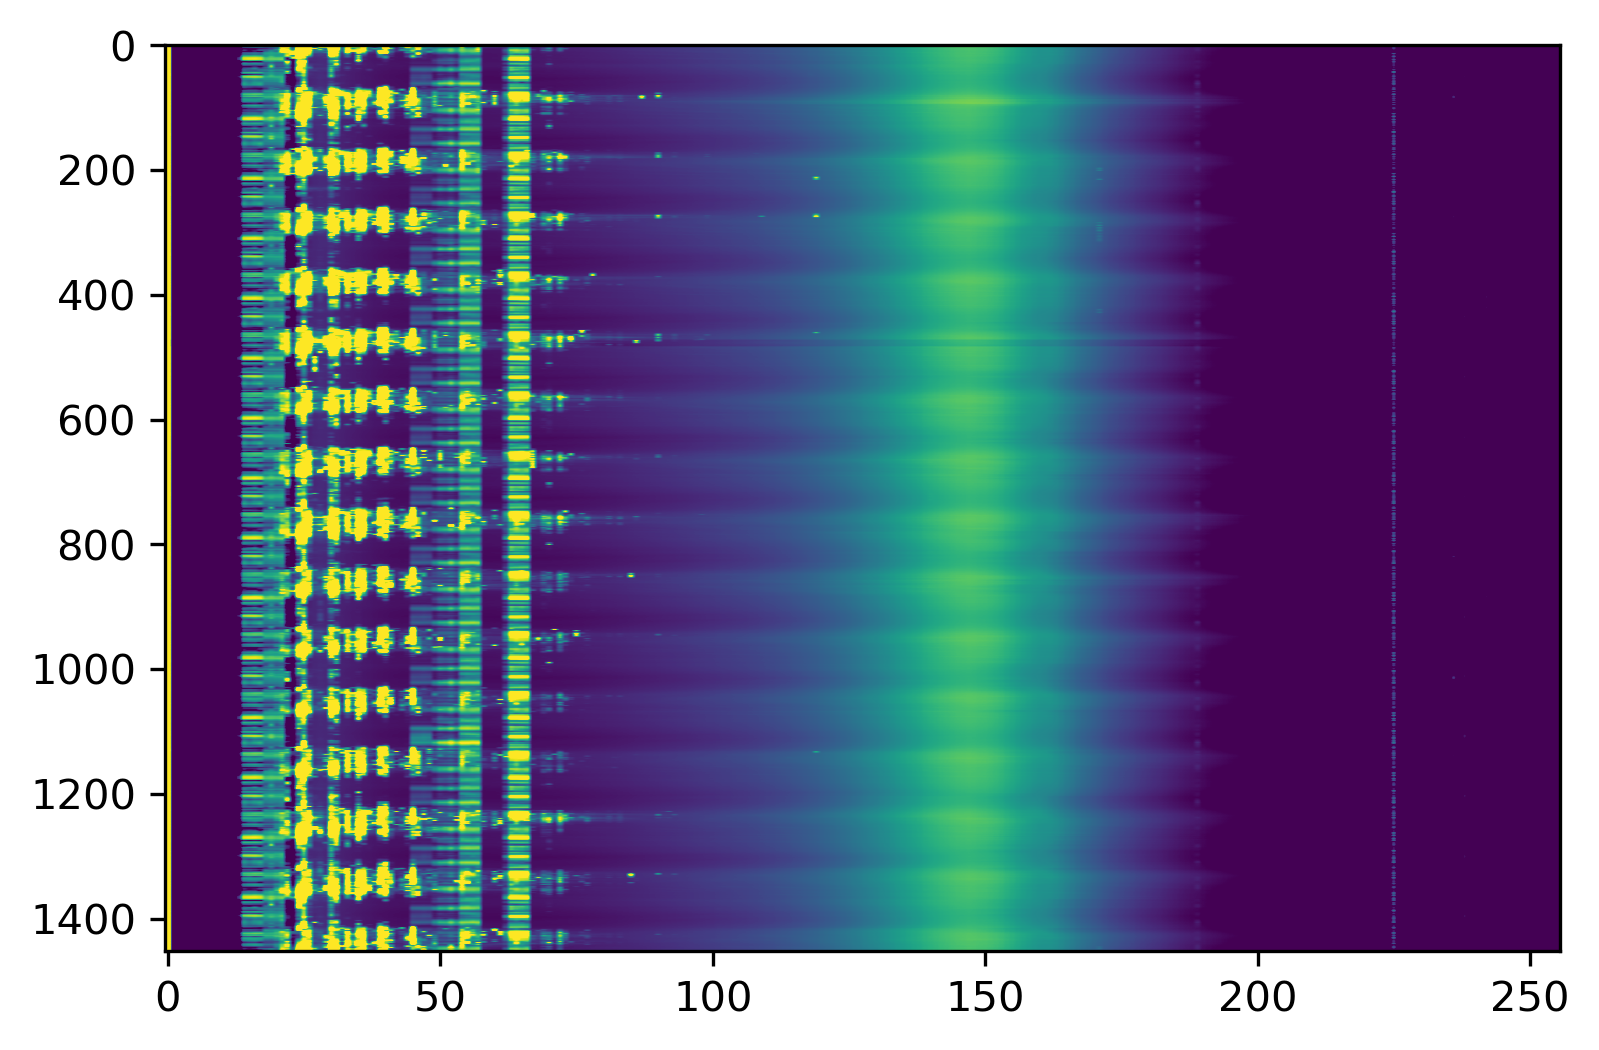

In [9]:
plt.figure(dpi=300)
plt.imshow(D2[:,0,:],vmax=90,vmin=70,aspect='auto')

(0.0, 50.0)

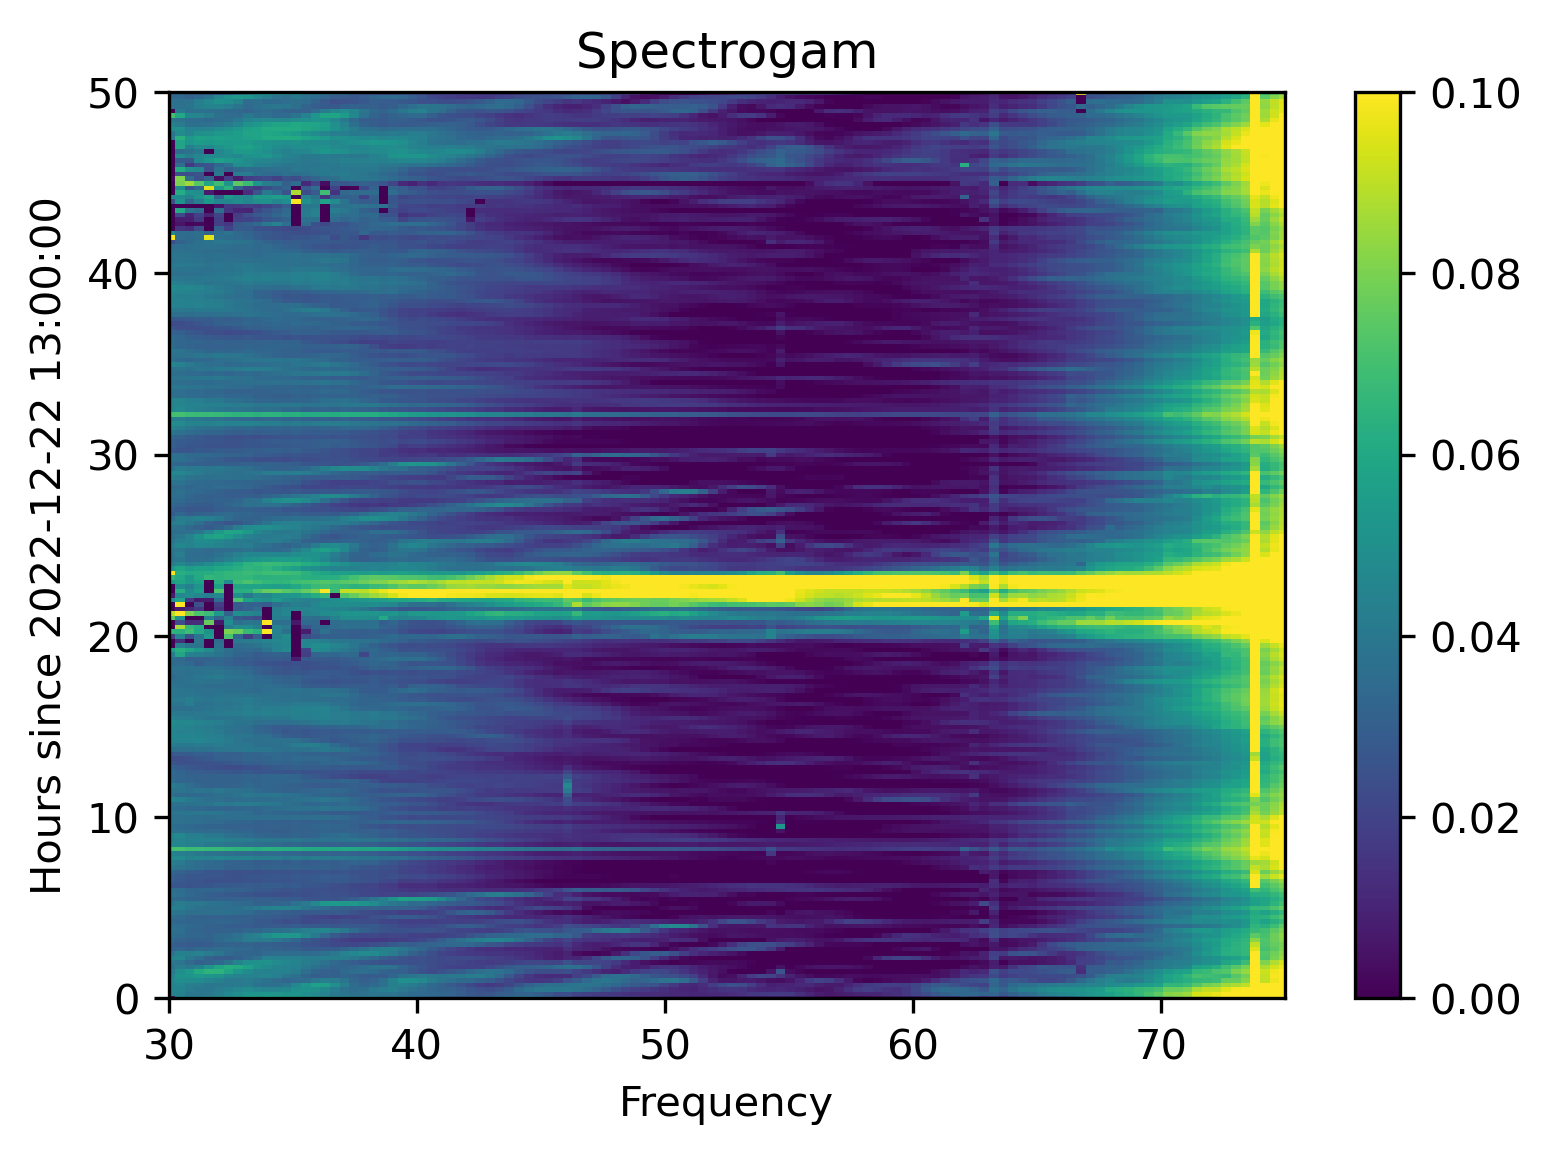

In [79]:
hour_of_day=np.arange(Dc.shape[0])/4#*tstep_min
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
yas=hour_of_day
lba_si_nr = 0
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(D[:,1,1]))
plt.pcolor(freq, yas, (Dc)) #,vmin=-80,vmax=-60)
plt.colorbar()
plt.xlabel('Frequency')
plt.ylabel('Hours since ' + START_TIME)
plt.clim([-0.0, 0.1])
plt.title(f" Spectrogam ")
#plt.savefig("./results/sst_lba_waterval.png")
#plt.ylim(180,200)
plt.xlim(30,75)
plt.ylim(0,50)

(0.6, 0.65)

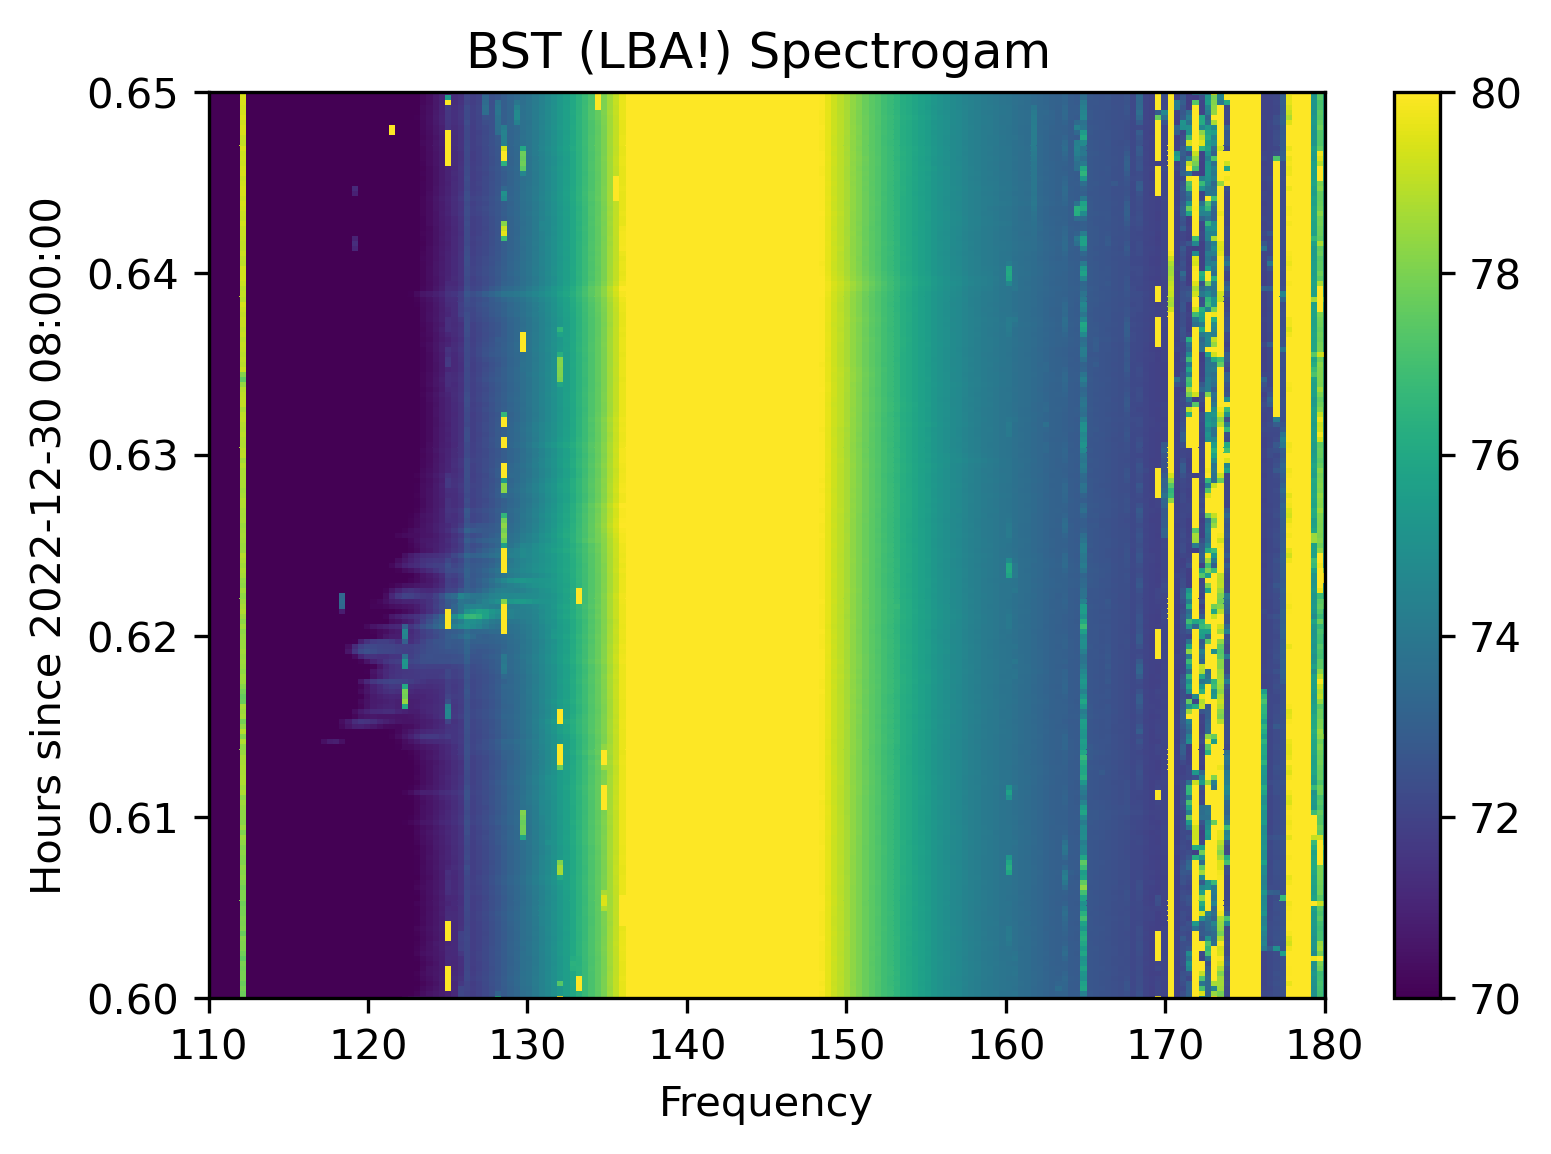

In [10]:
hour_of_day=np.arange(D.shape[0])/60/60#*tstep_min
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
yas=hour_of_day
lba_si_nr = 0
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(D[:,1,1]))
plt.pcolor(200-freq, yas[2000:3000], (D2[2000:3000,lba_si_nr,:])) #,vmin=-80,vmax=-60)
plt.colorbar()
plt.xlabel('Frequency')
plt.ylabel('Hours since ' + START_TIME)
plt.clim([70, 80])
plt.title(f"BST (LBA!) Spectrogam ")
#plt.savefig("./results/sst_lba_waterval.png")
#plt.ylim(180,200)
plt.xlim(110,180)
plt.ylim(0.6,0.65)

Text(0, 0.5, 'BST-SST')

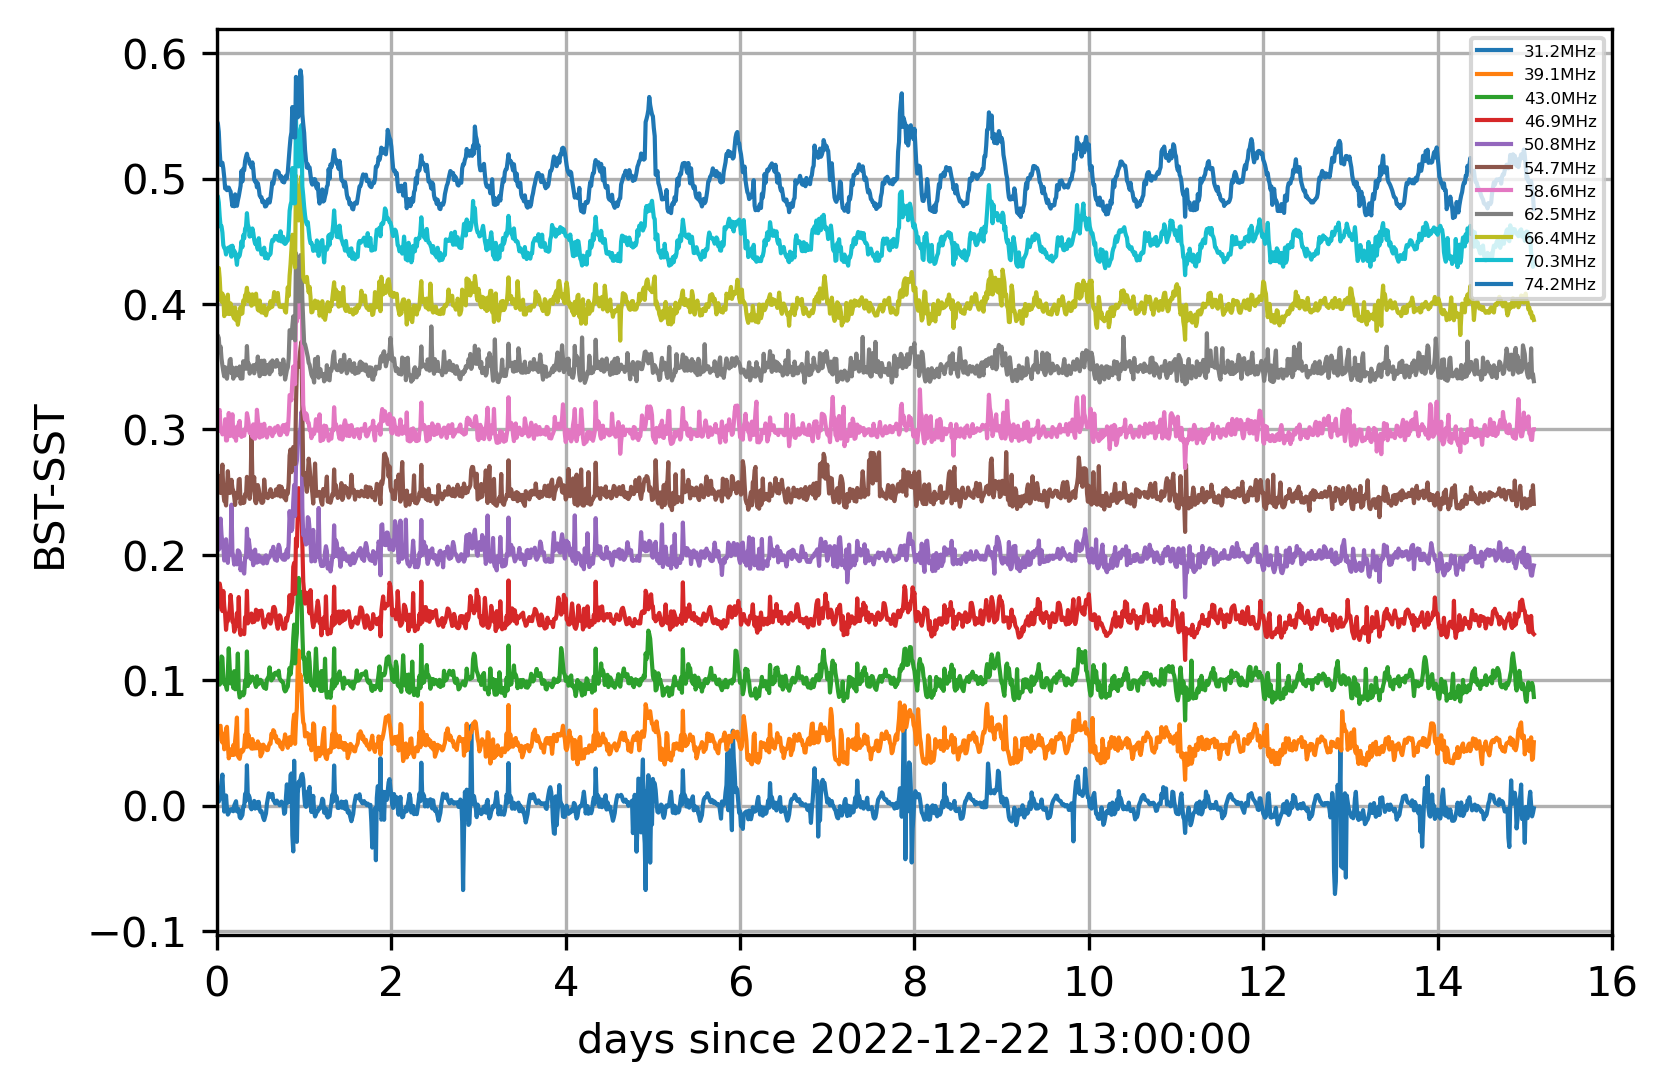

In [114]:
plt.figure(dpi=300)
cnt=0
for x in range(80,220,10):
    if np.mean(Dc[:,x])>0.1: continue;
    if np.std(Dc[:,x])>0.02: continue;
    Da=Dc[:,x]-np.mean(Dc[:,x])
    plt.plot(yas/24,Da+0.05*cnt,label='%.1fMHz'%(freq[x]),linewidth=1)
    cnt+=1
plt.legend(fontsize=4)
plt.grid()
plt.xlim(0,16)
plt.xlabel('days since ' + START_TIME)
plt.ylabel("BST-SST")